In [1]:
import numpy as np 
import pandas as pd 
import csv

df = pd.read_csv("16-09-27.csv", sep='\t', dtype={'frame.number':np.int64})
df = df.drop(['ip.src'],axis=1)
print(df.head(5))
df.shape

   frame.number  frame.time_relative  frame.len ip.proto  \
0             1             0.000000        156        6   
1             2             0.220575         66        6   
2             3             0.537609        284        6   
3             4             2.075699        156        6   
4             5             2.186605         90       17   

            frame.protocols         ip.dst  tcp.srcport  tcp.dstport  \
0  eth:ethertype:ip:tcp:tls  52.87.241.159      40767.0        443.0   
1      eth:ethertype:ip:tcp  192.168.1.106        443.0      40767.0   
2  eth:ethertype:ip:tcp:tls  52.87.241.159      40767.0        443.0   
3  eth:ethertype:ip:tcp:tls  52.87.241.159      40767.0        443.0   
4  eth:ethertype:ip:udp:ntp  192.168.1.196          NaN          NaN   

   udp.srcport  udp.dstport ip.dsfield.dscp            eth.src  \
0          NaN          NaN               0  30:8c:fb:2f:e4:b2   
1          NaN          NaN               0  14:cc:20:51:33:ea   
2       

/home/deepak/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (3,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(527035, 13)

In [2]:
#Selecting 1 of packets randomly of amazon Echo: 44:65:0d:56:cc:d3
echo = df[df['eth.src']=='44:65:0d:56:cc:d3'].sample(n=1,random_state=1)['frame.number']
echo_start = echo.iloc[0]-1
echo_start

32040

In [3]:
echo_total = len(df[df['eth.src']=='44:65:0d:56:cc:d3'])
echo_10 = int(round(echo_total*.1))
echo_10

3116

1470420

In [4]:
echo_10p = df[(echo_start):][df['eth.src']=='44:65:0d:56:cc:d3']
echo_10p

<ipython-input-4-5c69e15571b3>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  echo_10p = df[(echo_start):][df['eth.src']=='44:65:0d:56:cc:d3']


,frame.number,frame.time_relative,frame.len,ip.proto,frame.protocols,ip.dst,tcp.srcport,tcp.dstport,udp.srcport,udp.dstport,ip.dsfield.dscp,eth.src,eth.dst
32040,32041,5742.056713,74,6,eth:ethertype:ip:tcp,93.184.216.34,33282.0,80.0,NaN,NaN,0,44:65:0d:56:cc:d3,14:cc:20:51:33:ea
32043,32044,5742.169883,66,6,eth:ethertype:ip:tcp,93.184.216.34,33281.0,80.0,NaN,NaN,0,44:65:0d:56:cc:d3,14:cc:20:51:33:ea
32045,32046,5742.216645,66,6,eth:ethertype:ip:tcp,93.184.216.34,33282.0,80.0,NaN,NaN,0,44:65:0d:56:cc:d3,14:cc:20:51:33:ea
32046,32047,5742.217355,66,6,eth:ethertype:ip:tcp,93.184.216.34,33282.0,80.0,NaN,NaN,0,44:65:0d:56:cc:d3,14:cc:20:51:33:ea
32047,32048,5742.219355,75,17,eth:ethertype:ip:udp:dns,8.8.8.8,NaN,NaN,51224.0,53.0,0,44:65:0d:56:cc:d3,14:cc:20:51:33:ea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526866,526867,86362.621767,191,17,eth:ethertype:ip:udp:data,23.23.189.20,NaN,NaN,47532.0,33434.0,0,44:65:0d:56:cc:d3,14:cc:20:51:33:ea
526958,526959,86381.259183,201,17,eth:ethertype:ip:udp:data,23.23.189.20,NaN,NaN,49280.0,33434.0,0,44:65:0d:56:cc:d3,14:cc:20:51:33:ea
526986,526987,86389.459048,54,6,eth:ethertype:ip:tcp,176.32.100.25,52424.0,443.0,NaN,NaN,0,44:65:0d:56:cc:d3,14:cc:20:51:33:ea
526987,526988,86389.459158,95,6,eth:ethertype:ip:tcp:tls,176.32.100.25,52424.0,443.0,NaN,NaN,0,44:65:0d:56:cc:d3,14:cc:20:51:33:ea


In [6]:
echo_10pc = pd.DataFrame()
length = len(echo_10p.index)
print(length)
while(length>echo_10):
    echo_10p = echo_10p.drop(echo_10p.index[length-1])
    length = len(echo_10p.index)
echo_10p

17417


,frame.number,frame.time_relative,frame.len,ip.proto,frame.protocols,ip.dst,tcp.srcport,tcp.dstport,udp.srcport,udp.dstport,ip.dsfield.dscp,eth.src,eth.dst
32040,32041,5742.056713,74,6,eth:ethertype:ip:tcp,93.184.216.34,33282.0,80.0,NaN,NaN,0,44:65:0d:56:cc:d3,14:cc:20:51:33:ea
32043,32044,5742.169883,66,6,eth:ethertype:ip:tcp,93.184.216.34,33281.0,80.0,NaN,NaN,0,44:65:0d:56:cc:d3,14:cc:20:51:33:ea
32045,32046,5742.216645,66,6,eth:ethertype:ip:tcp,93.184.216.34,33282.0,80.0,NaN,NaN,0,44:65:0d:56:cc:d3,14:cc:20:51:33:ea
32046,32047,5742.217355,66,6,eth:ethertype:ip:tcp,93.184.216.34,33282.0,80.0,NaN,NaN,0,44:65:0d:56:cc:d3,14:cc:20:51:33:ea
32047,32048,5742.219355,75,17,eth:ethertype:ip:udp:dns,8.8.8.8,NaN,NaN,51224.0,53.0,0,44:65:0d:56:cc:d3,14:cc:20:51:33:ea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79108,79109,14493.817372,98,1,eth:ethertype:ip:icmp:data,192.168.1.1,NaN,NaN,NaN,NaN,0,44:65:0d:56:cc:d3,14:cc:20:51:33:ea
79110,79111,14493.822176,98,1,eth:ethertype:ip:icmp:data,192.168.1.1,NaN,NaN,NaN,NaN,0,44:65:0d:56:cc:d3,14:cc:20:51:33:ea
79112,79113,14493.825995,98,1,eth:ethertype:ip:icmp:data,192.168.1.1,NaN,NaN,NaN,NaN,0,44:65:0d:56:cc:d3,14:cc:20:51:33:ea
79114,79115,14493.829887,98,1,eth:ethertype:ip:icmp:data,192.168.1.1,NaN,NaN,NaN,NaN,0,44:65:0d:56:cc:d3,14:cc:20:51:33:ea


In [7]:
echo_np = echo_10p.index.to_numpy

1

In [8]:
import random

i = 0      # DNS ip = 192.168.1.1, des port 53, src port 44239, dscp 0, len 75
while(i<echo_10):
    while(i<2):
        echo_10p.loc[echo_10p.iloc[i].name,['frame.len','ip.proto','frame.protocols','ip.dst','tcp.srcport','tcp.dstport','udp.srcport','udp.dstport','ip.dsfield.dscp']] = 75, 17, 'eth:ethertype:ip:udp:dns', '192.168.1.1', np.NaN, np.NaN, 23456, 53, 0
        i+=1
    while(i<6):
        echo_10p.loc[echo_10p.iloc[i].name,['frame.len','ip.proto','frame.protocols','ip.dst','tcp.srcport','tcp.dstport','udp.srcport','udp.dstport','ip.dsfield.dscp']] = 75, 17, 'eth:ethertype:ip:udp:dns', '8.8.8.8', np.NaN, np.NaN, 23456, 53, 0
        i+=1
    rn = random.randint(1,5)           #random integer
    if (rn==1):
        echo_10p.loc[echo_10p.iloc[i].name,['frame.len','ip.proto','frame.protocols','ip.dst','tcp.srcport','tcp.dstport','udp.srcport','udp.dstport','ip.dsfield.dscp']] = random.choice([66,97,74,341,554,1472,148,296,774,2344]), 6, 'eth:ethertype:ip:tcp:tls', '62.210.205.141', random.choice([23323,23325,23326]), 443, np.NaN, np.NaN, 0
    else:
        echo_10p.loc[echo_10p.iloc[i].name,['frame.len','ip.proto','frame.protocols','ip.dst','tcp.srcport','tcp.dstport','udp.srcport','udp.dstport','ip.dsfield.dscp']] = random.choice([66,97,74,148,296]), 6, 'eth:ethertype:ip:tcp', '62.210.205.141', random.choice([23323,23325,23326]), 443, np.NaN, np.NaN, 0
    i+=1
    
echo_10p

,frame.number,frame.time_relative,frame.len,ip.proto,frame.protocols,ip.dst,tcp.srcport,tcp.dstport,udp.srcport,udp.dstport,ip.dsfield.dscp,eth.src,eth.dst
32040,32041,5742.056713,75,17,eth:ethertype:ip:udp:dns,192.168.1.1,NaN,NaN,23456.0,53.0,0,44:65:0d:56:cc:d3,14:cc:20:51:33:ea
32043,32044,5742.169883,75,17,eth:ethertype:ip:udp:dns,192.168.1.1,NaN,NaN,23456.0,53.0,0,44:65:0d:56:cc:d3,14:cc:20:51:33:ea
32045,32046,5742.216645,75,17,eth:ethertype:ip:udp:dns,8.8.8.8,NaN,NaN,23456.0,53.0,0,44:65:0d:56:cc:d3,14:cc:20:51:33:ea
32046,32047,5742.217355,75,17,eth:ethertype:ip:udp:dns,8.8.8.8,NaN,NaN,23456.0,53.0,0,44:65:0d:56:cc:d3,14:cc:20:51:33:ea
32047,32048,5742.219355,75,17,eth:ethertype:ip:udp:dns,8.8.8.8,NaN,NaN,23456.0,53.0,0,44:65:0d:56:cc:d3,14:cc:20:51:33:ea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79108,79109,14493.817372,148,6,eth:ethertype:ip:tcp,62.210.205.141,23326.0,443.0,NaN,NaN,0,44:65:0d:56:cc:d3,14:cc:20:51:33:ea
79110,79111,14493.822176,74,6,eth:ethertype:ip:tcp:tls,62.210.205.141,23325.0,443.0,NaN,NaN,0,44:65:0d:56:cc:d3,14:cc:20:51:33:ea
79112,79113,14493.825995,148,6,eth:ethertype:ip:tcp,62.210.205.141,23323.0,443.0,NaN,NaN,0,44:65:0d:56:cc:d3,14:cc:20:51:33:ea
79114,79115,14493.829887,97,6,eth:ethertype:ip:tcp,62.210.205.141,23325.0,443.0,NaN,NaN,0,44:65:0d:56:cc:d3,14:cc:20:51:33:ea


In [9]:
after_echo = echo_10p
# inserting changed row back to overall dataframe
# df.loc[after_echo.loc[0].]

In [10]:
test = df
i = 0
while (i<echo_10):
    test.loc[after_echo.iloc[i].name] = after_echo.iloc[i]
    i+=1
test.head(32045)

,frame.number,frame.time_relative,frame.len,ip.proto,frame.protocols,ip.dst,tcp.srcport,tcp.dstport,udp.srcport,udp.dstport,ip.dsfield.dscp,eth.src,eth.dst
0,1,0.000000,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,NaN,NaN,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
1,2,0.220575,66,6,eth:ethertype:ip:tcp,192.168.1.106,443.0,40767.0,NaN,NaN,0,14:cc:20:51:33:ea,30:8c:fb:2f:e4:b2
2,3,0.537609,284,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,NaN,NaN,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
3,4,2.075699,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,NaN,NaN,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
4,5,2.186605,90,17,eth:ethertype:ip:udp:ntp,192.168.1.196,NaN,NaN,123.0,4967.0,6,14:cc:20:51:33:ea,d0:52:a8:00:67:5e
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32040,32041,5742.056713,75,17,eth:ethertype:ip:udp:dns,192.168.1.1,NaN,NaN,23456.0,53.0,0,44:65:0d:56:cc:d3,14:cc:20:51:33:ea
32041,32042,5742.125377,66,6,eth:ethertype:ip:tcp,192.168.1.106,443.0,40767.0,NaN,NaN,0,14:cc:20:51:33:ea,30:8c:fb:2f:e4:b2
32042,32043,5742.159399,66,6,eth:ethertype:ip:tcp,192.168.1.240,80.0,33281.0,NaN,NaN,0,14:cc:20:51:33:ea,44:65:0d:56:cc:d3
32043,32044,5742.169883,75,17,eth:ethertype:ip:udp:dns,192.168.1.1,NaN,NaN,23456.0,53.0,0,44:65:0d:56:cc:d3,14:cc:20:51:33:ea


In [62]:
# # write to CSV
# test.to_csv('simulated_csv.csv')

In [11]:
#Selecting 1 of packets randomly of amazon Dropcam: 30:8c:fb:2f:e4:b2

dropcam = df[df['eth.src']=='30:8c:fb:2f:e4:b2'].sample(n=1,random_state=1)['frame.number']
dropcam
dropcam_start = echo.iloc[0]-1
dropcam_start
dropcam_total = len(df[df['eth.src']=='30:8c:fb:2f:e4:b2'])
dropcam_10 = int(round(dropcam_total*.1))
print(dropcam_10)
# dropcam_total
dropcam_10p = df[(dropcam_start):][df['eth.src']=='30:8c:fb:2f:e4:b2']
dropcam_10p


10503


<ipython-input-11-97be0c7c33fc>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dropcam_10p = df[(dropcam_start):][df['eth.src']=='30:8c:fb:2f:e4:b2']


,frame.number,frame.time_relative,frame.len,ip.proto,frame.protocols,ip.dst,tcp.srcport,tcp.dstport,udp.srcport,udp.dstport,ip.dsfield.dscp,eth.src,eth.dst
32062,32063,5743.989610,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,NaN,NaN,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
32064,32065,5745.013440,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,NaN,NaN,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
32072,32073,5746.054957,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,NaN,NaN,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
32083,32084,5747.078354,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,NaN,NaN,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
32089,32090,5747.487942,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,NaN,NaN,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
527013,527014,86395.711516,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,NaN,NaN,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
527018,527019,86396.238686,284,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,NaN,NaN,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
527021,527022,86396.741598,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,NaN,NaN,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
527025,527026,86397.659465,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,NaN,NaN,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea


In [12]:
dropcam_10pc = pd.DataFrame()
length = len(dropcam_10p.index)
while(length>dropcam_10):
    dropcam_10p = dropcam_10p.drop(dropcam_10p.index[length-1])
    length = len(dropcam_10p.index)
dropcam_10p

,frame.number,frame.time_relative,frame.len,ip.proto,frame.protocols,ip.dst,tcp.srcport,tcp.dstport,udp.srcport,udp.dstport,ip.dsfield.dscp,eth.src,eth.dst
32062,32063,5743.989610,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,NaN,NaN,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
32064,32065,5745.013440,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,NaN,NaN,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
32072,32073,5746.054957,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,NaN,NaN,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
32083,32084,5747.078354,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,NaN,NaN,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
32089,32090,5747.487942,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,NaN,NaN,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89589,89590,16434.746159,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,NaN,NaN,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
89591,89592,16435.774144,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,NaN,NaN,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
89599,89600,16436.808227,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,NaN,NaN,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
89601,89602,16436.870410,42,NaN,eth:ethertype:arp,NaN,NaN,NaN,NaN,NaN,NaN,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea


In [13]:
dropcam_np = dropcam_10p.index.to_numpy

In [14]:
dropcam_np

<bound method IndexOpsMixin.to_numpy of Int64Index([32062, 32064, 32072, 32083, 32089, 32091, 32093, 32114, 32139,
            32141,
            ...
            89562, 89573, 89579, 89583, 89585, 89589, 89591, 89599, 89601,
            89605],
           dtype='int64', length=10503)>

In [15]:
#SIMULATION
import random

i = 0      # DNS ip = 192.168.1.1, des port 53, src port 33486, dscp 0, len 79, 
while(i<dropcam_10):
    while(i<2):
        dropcam_10p.loc[dropcam_10p.iloc[i].name,['frame.len','ip.proto','frame.protocols','ip.dst','tcp.srcport','tcp.dstport','udp.srcport','udp.dstport','ip.dsfield.dscp']] = 79, 17, 'eth:ethertype:ip:udp:dns', '192.168.1.1', np.NaN, np.NaN, 33486, 53, 0
        i+=1
    while(i<6):
        dropcam_10p.loc[dropcam_10p.iloc[i].name,['frame.len','ip.proto','frame.protocols','ip.dst','tcp.srcport','tcp.dstport','udp.srcport','udp.dstport','ip.dsfield.dscp']] = 79, 17, 'eth:ethertype:ip:udp:dns', '8.8.8.8', np.NaN, np.NaN, 33486, 53, 0
        i+=1
    rn = random.randint(1,5)           #random integer
    if (rn!=1):
        dropcam_10p.loc[dropcam_10p.iloc[i].name,['frame.len','ip.proto','frame.protocols','ip.dst','tcp.srcport','tcp.dstport','udp.srcport','udp.dstport','ip.dsfield.dscp']] = 66, 6, 'eth:ethertype:ip:tcp:tls', '158.69.38.240', random.choice([45546,45547,45548]), 443, np.NaN, np.NaN, 0
    else:
        dropcam_10p.loc[dropcam_10p.iloc[i].name,['frame.len','ip.proto','frame.protocols','ip.dst','tcp.srcport','tcp.dstport','udp.srcport','udp.dstport','ip.dsfield.dscp']] = random.choice([156, 248, 172, 312]), 6,'192.168.1.106', '158.69.38.240', random.choice([45546,45547,45548]), 443, np.NaN, np.NaN, 0
    i+=1
    
dropcam_10p

,frame.number,frame.time_relative,frame.len,ip.proto,frame.protocols,ip.dst,tcp.srcport,tcp.dstport,udp.srcport,udp.dstport,ip.dsfield.dscp,eth.src,eth.dst
32062,32063,5743.989610,79,17,eth:ethertype:ip:udp:dns,192.168.1.1,NaN,NaN,33486.0,53.0,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
32064,32065,5745.013440,79,17,eth:ethertype:ip:udp:dns,192.168.1.1,NaN,NaN,33486.0,53.0,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
32072,32073,5746.054957,79,17,eth:ethertype:ip:udp:dns,8.8.8.8,NaN,NaN,33486.0,53.0,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
32083,32084,5747.078354,79,17,eth:ethertype:ip:udp:dns,8.8.8.8,NaN,NaN,33486.0,53.0,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
32089,32090,5747.487942,79,17,eth:ethertype:ip:udp:dns,8.8.8.8,NaN,NaN,33486.0,53.0,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89589,89590,16434.746159,66,6,eth:ethertype:ip:tcp:tls,158.69.38.240,45546.0,443.0,NaN,NaN,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
89591,89592,16435.774144,66,6,eth:ethertype:ip:tcp:tls,158.69.38.240,45546.0,443.0,NaN,NaN,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
89599,89600,16436.808227,66,6,eth:ethertype:ip:tcp:tls,158.69.38.240,45547.0,443.0,NaN,NaN,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
89601,89602,16436.870410,66,6,eth:ethertype:ip:tcp:tls,158.69.38.240,45546.0,443.0,NaN,NaN,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea


In [16]:
after_dropcam = dropcam_10p

# inserting changed row back to overall dataframe

# test = df
i = 0
while (i<dropcam_10):
    test.loc[after_dropcam.iloc[i].name] = after_dropcam.iloc[i]
    i+=1
test.head(32065)

,frame.number,frame.time_relative,frame.len,ip.proto,frame.protocols,ip.dst,tcp.srcport,tcp.dstport,udp.srcport,udp.dstport,ip.dsfield.dscp,eth.src,eth.dst
0,1,0.000000,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,NaN,NaN,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
1,2,0.220575,66,6,eth:ethertype:ip:tcp,192.168.1.106,443.0,40767.0,NaN,NaN,0,14:cc:20:51:33:ea,30:8c:fb:2f:e4:b2
2,3,0.537609,284,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,NaN,NaN,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
3,4,2.075699,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,NaN,NaN,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
4,5,2.186605,90,17,eth:ethertype:ip:udp:ntp,192.168.1.196,NaN,NaN,123.0,4967.0,6,14:cc:20:51:33:ea,d0:52:a8:00:67:5e
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32060,32061,5742.760900,60,6,eth:ethertype:ip:tcp:data,54.210.202.2,2173.0,443.0,NaN,NaN,0,d0:52:a8:00:67:5e,14:cc:20:51:33:ea
32061,32062,5742.977143,54,6,eth:ethertype:ip:tcp,192.168.1.196,443.0,2173.0,NaN,NaN,0,14:cc:20:51:33:ea,d0:52:a8:00:67:5e
32062,32063,5743.989610,79,17,eth:ethertype:ip:udp:dns,192.168.1.1,NaN,NaN,33486.0,53.0,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
32063,32064,5744.194788,66,6,eth:ethertype:ip:tcp,192.168.1.106,443.0,40767.0,NaN,NaN,0,14:cc:20:51:33:ea,30:8c:fb:2f:e4:b2


In [85]:
# write to CSV
# test.to_csv('simulated_csv.csv',index=None)

In [18]:
#Selecting 1 of packets randomly of amazon HP Printer: 70:5a:0f:e4:9b:c0
printer = df[df['eth.src']=='70:5a:0f:e4:9b:c0'].sample(n=1,random_state=1)['frame.number']
printer_start = echo.iloc[0]-1

printer_total = len(df[df['eth.src']=='70:5a:0f:e4:9b:c0'])
printer_10 = int(round(printer_total*.1))
print(printer_10)

printer_10p = df[(printer_start):][df['eth.src']=='70:5a:0f:e4:9b:c0']

# printer
printer_10pc = pd.DataFrame()
length = len(printer_10p.index)
while(length>printer_10):
    printer_10p = printer_10p.drop(printer_10p.index[length-1])
    length = len(printer_10p.index)
print(printer_10p)


#SIMULATION
import random

i = 0      # DNS ip = 192.168.1.1, des port 53, src port 58776, dscp 0, len 98
while(i<printer_10):
    while(i<2):
        printer_10p.loc[printer_10p.iloc[i].name,['frame.len','ip.proto','frame.protocols','ip.dst','tcp.srcport','tcp.dstport','udp.srcport','udp.dstport','ip.dsfield.dscp']] = 84, 17, 'eth:ethertype:ip:udp:dns', '192.168.1.1', np.NaN, np.NaN, 44675, 53, 0
        i+=1
    while(i<6):
        printer_10p.loc[printer_10p.iloc[i].name,['frame.len','ip.proto','frame.protocols','ip.dst','tcp.srcport','tcp.dstport','udp.srcport','udp.dstport','ip.dsfield.dscp']] = 84, 17, 'eth:ethertype:ip:udp:dns', '8.8.8.8', np.NaN, np.NaN, 44675, 53, 0
        i+=1
    rn = random.randint(1,5)           #random integer
    if (rn==1):
        printer_10p.loc[printer_10p.iloc[i].name,['frame.len','ip.proto','frame.protocols','ip.dst','tcp.srcport','tcp.dstport','udp.srcport','udp.dstport','ip.dsfield.dscp']] = random.choice([140,280,356]), 6, 'eth:ethertype:ip:tcp:tls','62.210.177.42', random.choice([44765,44766,44767]), 443, np.NaN, np.NaN, 0
    else:
        printer_10p.loc[printer_10p.iloc[i].name,['frame.len','ip.proto','frame.protocols','ip.dst','tcp.srcport','tcp.dstport','udp.srcport','udp.dstport','ip.dsfield.dscp']] = random.choice([66,97,140,280,356,246]), 6, 'eth:ethertype:ip:tcp','62.210.177.42', random.choice([44765,44766,44767]), 443, np.NaN, np.NaN, 0
    i+=1
    
print(printer_10p)

after_printer = printer_10p

# inserting changed row back to overall dataframe

# test = df
i = 0
while (i<printer_10):
    test.loc[after_printer.iloc[i].name] = after_printer.iloc[i]
    i+=1
test.head(79055)

670


<ipython-input-18-a5c42d2be00c>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  printer_10p = df[(printer_start):][df['eth.src']=='70:5a:0f:e4:9b:c0']


       frame.number  frame.time_relative  frame.len ip.proto  \
32239         32240          5773.397398        140        6   
32271         32272          5778.599311         60      NaN   
32348         32349          5799.326245         46        2   
32360         32361          5802.142503         46        2   
32540         32541          5833.705364         86      NaN   
...             ...                  ...        ...      ...   
78957         78958         14465.656859        140        6   
78982         78983         14470.859250         60      NaN   
79052         79053         14484.918634         86      NaN   
79054         79055         14485.420340         86      NaN   
79055         79056         14485.651749         86      NaN   

                              frame.protocols           ip.dst  tcp.srcport  \
32239                    eth:ethertype:ip:tcp     15.72.162.53      21787.0   
32271                       eth:ethertype:arp              NaN          N

,frame.number,frame.time_relative,frame.len,ip.proto,frame.protocols,ip.dst,tcp.srcport,tcp.dstport,udp.srcport,udp.dstport,ip.dsfield.dscp,eth.src,eth.dst
0,1,0.000000,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,NaN,NaN,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
1,2,0.220575,66,6,eth:ethertype:ip:tcp,192.168.1.106,443.0,40767.0,NaN,NaN,0,14:cc:20:51:33:ea,30:8c:fb:2f:e4:b2
2,3,0.537609,284,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,NaN,NaN,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
3,4,2.075699,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,NaN,NaN,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
4,5,2.186605,90,17,eth:ethertype:ip:udp:ntp,192.168.1.196,NaN,NaN,123.0,4967.0,6,14:cc:20:51:33:ea,d0:52:a8:00:67:5e
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79050,79051,14484.218542,66,6,eth:ethertype:ip:tcp,52.8.89.254,35792.0,5222.0,NaN,NaN,0,00:16:6c:ab:6b:88,14:cc:20:51:33:ea
79051,79052,14484.519614,86,NaN,eth:ethertype:ipv6:ipv6.hopopts:icmpv6,NaN,NaN,NaN,NaN,NaN,NaN,00:16:6c:ab:6b:88,33:33:00:00:00:fb
79052,79053,14484.918634,97,6,eth:ethertype:ip:tcp,62.210.177.42,44765.0,443.0,NaN,NaN,0,70:5a:0f:e4:9b:c0,33:33:00:01:00:03
79053,79054,14484.991996,86,NaN,eth:ethertype:ipv6:ipv6.hopopts:icmpv6,NaN,NaN,NaN,NaN,NaN,NaN,e0:76:d0:33:bb:85,33:33:ff:33:bb:85


In [19]:
printer_np = printer_10p.index.to_numpy

In [20]:
# print(echo_10+dropcam_10+printer_10)
index_array = printer_10p.index.append(echo_10p.index.append(dropcam_10p.index))
print(index_array)
index_array = np.array(index_array)
# index_array = np.concatenate((index_array,echo_np))
index_array

Int64Index([32239, 32271, 32348, 32360, 32540, 32543, 32547, 32563, 32664,
            32694,
            ...
            89562, 89573, 89579, 89583, 89585, 89589, 89591, 89599, 89601,
            89605],
           dtype='int64', length=14289)


array([32239, 32271, 32348, ..., 89599, 89601, 89605])

In [22]:
from numpy import savetxt
savetxt('no_ipsrc_array_indices.txt',index_array)

In [23]:
# write to CSV
test.to_csv('no_ipsrc_simulated_csv.csv',index=None)

In [3]:
import csv
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
arra = []
with open('no_ipsrc_simulated_csv.csv') as file:
    reader = csv.reader(file, delimiter=',')
    a = 0
    for row in reader:
        if(a==0):
            a+=1
            continue

        arr = np.array(row)
        if(arr[7]==""):
            arr[7]=arr[9]
        if(arr[8]==""):
            arr[8]=arr[10]
        arr = np.delete(arr,(8,9))
        
        arra.append(arr)

file.close()
 

columns = ['frameNumber','timeRelative','frame.len','protocolNumber','protocolName','ipDst','srcPort','dstPort','ipDSCP','ethsrc','ethdst']

dfs = pd.DataFrame(data=arra,columns=columns)
dfs

,frameNumber,timeRelative,frame.len,protocolNumber,protocolName,ipDst,srcPort,dstPort,ipDSCP,ethsrc,ethdst
0,1,0.0,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
1,2,0.220575,66,6,eth:ethertype:ip:tcp,192.168.1.106,443.0,40767.0,0,14:cc:20:51:33:ea,30:8c:fb:2f:e4:b2
2,3,0.537609,284,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
3,4,2.075699,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
4,5,2.186605,90,17,eth:ethertype:ip:udp:ntp,192.168.1.196,,4967.0,6,14:cc:20:51:33:ea,d0:52:a8:00:67:5e
...,...,...,...,...,...,...,...,...,...,...,...
527030,527031,86398.649904,42,,eth:ethertype:arp,,,,,f4:f2:6d:93:51:f1,14:cc:20:51:33:ea
527031,527032,86398.698987,156,6.0,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,0.0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
527032,527033,86398.904135,66,6.0,eth:ethertype:ip:tcp,192.168.1.106,443.0,40767.0,0.0,14:cc:20:51:33:ea,30:8c:fb:2f:e4:b2
527033,527034,86399.490511,118,1.0,eth:ethertype:ip:icmp:data,192.168.1.1,,,0.0,ec:1a:59:79:f4:89,14:cc:20:51:33:ea


In [4]:
arra = []
with open('16-09-27.csv') as file:
    reader = csv.reader(file, delimiter='\t')
    a = 0
    for row in reader:
        if(a==0):
            a+=1
            continue
#         if(a==10):
#             break
        arr = np.array(row)
        if(arr[7]==""):
            arr[7]=arr[9]
        if(arr[8]==""):
            arr[8]=arr[10]
        arr = np.delete(arr,(9,10))
        
        arra.append(arr)
#         a += 1
#     print(arr)
#     print(ar)
# file.close()
 
# arra = np.array(ar)
columns = ['frameNumber','timeRelative','frame.len','protocolNumber','protocolName','ipSrc','ipDst','srcPort','dstPort','ipDSCP','ethsrc','ethdst']

df27 = pd.DataFrame(data=arra,columns=columns)

In [5]:
df27 = df27.drop(['ipSrc'], axis=1)
df27

,frameNumber,timeRelative,frame.len,protocolNumber,protocolName,ipDst,srcPort,dstPort,ipDSCP,ethsrc,ethdst
0,1,0.000000000,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767,443,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
1,2,0.220575000,66,6,eth:ethertype:ip:tcp,192.168.1.106,443,40767,0,14:cc:20:51:33:ea,30:8c:fb:2f:e4:b2
2,3,0.537609000,284,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767,443,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
3,4,2.075699000,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767,443,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
4,5,2.186605000,90,17,eth:ethertype:ip:udp:ntp,192.168.1.196,123,4967,6,14:cc:20:51:33:ea,d0:52:a8:00:67:5e
...,...,...,...,...,...,...,...,...,...,...,...
527030,527031,86398.649904000,42,,eth:ethertype:arp,,,,,f4:f2:6d:93:51:f1,14:cc:20:51:33:ea
527031,527032,86398.698987000,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767,443,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
527032,527033,86398.904135000,66,6,eth:ethertype:ip:tcp,192.168.1.106,443,40767,0,14:cc:20:51:33:ea,30:8c:fb:2f:e4:b2
527033,527034,86399.490511000,118,1,eth:ethertype:ip:icmp:data,192.168.1.1,,,0,ec:1a:59:79:f4:89,14:cc:20:51:33:ea


In [6]:
dfj = df27.append(dfs,ignore_index=True)
dfj

,frameNumber,timeRelative,frame.len,protocolNumber,protocolName,ipDst,srcPort,dstPort,ipDSCP,ethsrc,ethdst
0,1,0.000000000,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767,443,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
1,2,0.220575000,66,6,eth:ethertype:ip:tcp,192.168.1.106,443,40767,0,14:cc:20:51:33:ea,30:8c:fb:2f:e4:b2
2,3,0.537609000,284,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767,443,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
3,4,2.075699000,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767,443,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
4,5,2.186605000,90,17,eth:ethertype:ip:udp:ntp,192.168.1.196,123,4967,6,14:cc:20:51:33:ea,d0:52:a8:00:67:5e
...,...,...,...,...,...,...,...,...,...,...,...
1054065,527031,86398.649904,42,,eth:ethertype:arp,,,,,f4:f2:6d:93:51:f1,14:cc:20:51:33:ea
1054066,527032,86398.698987,156,6.0,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,0.0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
1054067,527033,86398.904135,66,6.0,eth:ethertype:ip:tcp,192.168.1.106,443.0,40767.0,0.0,14:cc:20:51:33:ea,30:8c:fb:2f:e4:b2
1054068,527034,86399.490511,118,1.0,eth:ethertype:ip:icmp:data,192.168.1.1,,,0.0,ec:1a:59:79:f4:89,14:cc:20:51:33:ea


In [7]:
features = ['frameNumber','timeRelative','frame.len','protocolNumber','protocolName','ipDst','srcPort','dstPort','ipDSCP']


Xj = dfj[features]

y1 = dfj['ethsrc']

y2 = dfj['ethdst']
Xj

,frameNumber,timeRelative,frame.len,protocolNumber,protocolName,ipDst,srcPort,dstPort,ipDSCP
0,1,0.000000000,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767,443,0
1,2,0.220575000,66,6,eth:ethertype:ip:tcp,192.168.1.106,443,40767,0
2,3,0.537609000,284,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767,443,0
3,4,2.075699000,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767,443,0
4,5,2.186605000,90,17,eth:ethertype:ip:udp:ntp,192.168.1.196,123,4967,6
...,...,...,...,...,...,...,...,...,...
1054065,527031,86398.649904,42,,eth:ethertype:arp,,,,
1054066,527032,86398.698987,156,6.0,eth:ethertype:ip:tcp:tls,52.87.241.159,40767.0,443.0,0.0
1054067,527033,86398.904135,66,6.0,eth:ethertype:ip:tcp,192.168.1.106,443.0,40767.0,0.0
1054068,527034,86399.490511,118,1.0,eth:ethertype:ip:icmp:data,192.168.1.1,,,0.0


In [8]:
#################PREPROCESSING######################

catCols = ['frameNumber','timeRelative','frame.len','protocolNumber','srcPort','dstPort','ipDSCP']
for col in catCols:
    Xj[col] = pd.to_numeric(Xj[col],errors='coerce')

# print(Xj.dtypes)


textCols = ['protocolName', 'ipDst']

for col in textCols:
    Xj.loc[Xj[col]=='',[col]] = "missing"
categories = [Xj[column].unique() for column in textCols]
cat_colwise = categories
# print(categories)

# categories = [item for sublist in categories for item in sublist]
# categories = list(set(categories))



from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=-1)
imp.fit(Xj)


Xt = imp.transform(Xj)
Xju = pd.DataFrame(data=Xt,columns=features)

# Xju.dtypes

enc = OrdinalEncoder(dtype=np.float64)
enc.fit(Xju)
X_enc = enc.transform(Xju)
Xjug = pd.DataFrame(data=X_enc,columns=features)


from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le1.fit(y1)
le1.classes_
y = le1.transform(y1)

<ipython-input-8-2e23010d8dcf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xj[col] = pd.to_numeric(Xj[col],errors='coerce')
/home/deepak/.local/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [9]:
################   ORIGINAL FILE FOR MODEL    #############

features = ['frameNumber','timeRelative','frame.len','protocolNumber','protocolName','ipDst','srcPort','dstPort','ipDSCP']

# print(arra)
X27 = df27[features]
# print(X)
# X.head()
y1 = df27['ethsrc']
# print(y1)
# y1.head()
y2 = df27['ethdst']

In [10]:
catCols = ['frameNumber','timeRelative','frame.len','protocolNumber','srcPort','dstPort','ipDSCP']
for col in catCols:
    X27[col] = pd.to_numeric(X27[col],errors='coerce')

print(X27.dtypes)


textCols = ['protocolName', 'ipDst']

for col in textCols:
    X27.loc[X27[col]=='',[col]] = "missing"
# categories = [X[column].unique() for column in textCols]
# cat_colwise = categories
# print(categories)

# categories = [item for sublist in categories for item in sublist]
# categories = list(set(categories))



# from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=-1)
imp.fit(X27)


Xt = imp.transform(X27)

<ipython-input-10-f1d3b4c33ac9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X27[col] = pd.to_numeric(X27[col],errors='coerce')


frameNumber         int64
timeRelative      float64
frame.len           int64
protocolNumber    float64
protocolName       object
ipDst              object
srcPort           float64
dstPort           float64
ipDSCP            float64
dtype: object


/home/deepak/.local/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [11]:
X27 = pd.DataFrame(data=Xt,columns=features)

In [12]:
X_enc = enc.transform(X27)
X27 = pd.DataFrame(data=X_enc,columns=features)

In [13]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le1.fit(y1)
le1.classes_
y27 = le1.transform(y1)

In [14]:
# START MODEL HERE!!
##########################################################
#################################
#######################################

from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)  89
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)   90
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)    0.8991643834576765
X_train, X_test, y_train, y_test = train_test_split(X27, y27, test_size=0.3, random_state=0) 

from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier() 
classifier=classifier.fit(X_train,y_train) 
predicted=classifier.predict(X_test)

print('done')

done


In [15]:
import pickle
filename = 'no_ipsrc_jugaad_model.sav'
pickle.dump(classifier,open(filename,'wb'))

In [16]:
classifier.predict_proba(X_test)[:-33]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
classifier.feature_importances_

array([0.07002346, 0.06981787, 0.1270703 , 0.0227309 , 0.05725067,
       0.25066624, 0.25244818, 0.14519261, 0.00479978])

In [18]:
XJ = Xjug.iloc[527035:,:]
classifier.score(XJ,y[527035:])

0.8824632140180444

In [19]:
classifier.score(XJ,y27)

0.8824632140180444

In [20]:
classifier.score(X27,y27)

0.9691595434838294

In [21]:
from sklearn.model_selection import cross_val_score
import numpy as np
cv = cross_val_score(classifier, X_train, y_train, cv=10)
print(cv)
print(np.mean(cv))
# scores
print("CV")

[0.89816496 0.89594232 0.90038761 0.89605074 0.90060176 0.90019516
 0.89523474 0.89759297 0.89843326 0.89938198]
0.898198551052716
CV


In [22]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

print ('Confusion Matrix :') 
CM = confusion_matrix(y_test, predicted, normalize="pred")
CM_not = confusion_matrix(y_test,predicted)
print(CM)

Confusion Matrix :
[[9.14198706e-01 2.83205891e-04 0.00000000e+00 6.88705234e-04
  7.80865894e-03 0.00000000e+00 3.98142004e-03 1.89681335e-04
  1.99978950e-03 7.95228628e-03 7.75903614e-02 1.62778079e-03
  1.56154938e-02 0.00000000e+00 2.80155642e-02 2.76110444e-02
  2.68020305e-02 9.07354346e-03]
 [7.61324705e-05 8.92098556e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.98807157e-03 1.07951807e-01 0.00000000e+00
  0.00000000e+00 1.40022548e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.21568627e-01 0.00000000e+00
  2.89209590e-05 3.70370370e-02 0.00000000e+00 0.00000000e+00
  2.10504157e-04 0.00000000e+00 0.00000000e+00 2.17037439e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.52264941e-04 1.41602945e-04 0.00000000e+00 8.80165289e-01
  1.93770425e-03 0.00000000e+00 1.52621102e-02 1.89681335e-04
  3.15756236e-

In [23]:
print ('Report : ') 
print (classification_report(y_test, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.91      0.92      0.92     13083
           1       0.89      0.88      0.89      7147
           2       0.92      0.84      0.88        56
           3       0.88      0.87      0.87      1475
           4       0.93      0.92      0.92     69636
           5       0.89      0.83      0.86        29
           6       0.66      0.67      0.67      1501
           7       0.97      0.97      0.97     31530
           8       0.91      0.91      0.91      9467
           9       0.62      0.63      0.62       494
          10       0.47      0.48      0.47      1994
          11       0.93      0.93      0.93      1861
          12       0.68      0.70      0.69      4763
          13       0.84      0.85      0.84      4388
          14       0.66      0.68      0.67      1244
          15       0.56      0.57      0.57      2457
          16       0.77      0.78      0.77      4858
          17     

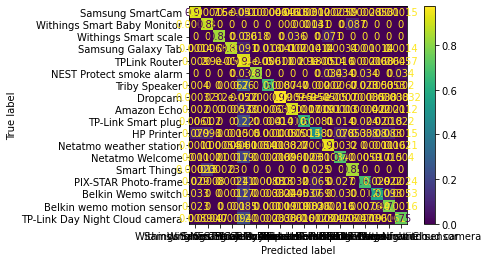

In [24]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.metrics import plot_confusion_matrix

mac_to_device = {'00:16:6c:ab:6b:88':'Samsung SmartCam', '00:24:e4:11:18:a8':'Withings Smart Baby Monitor', '00:24:e4:1b:6f:96':'Withings Smart scale',
                '08:21:ef:3b:fc:e3':'Samsung Galaxy Tab', '14:cc:20:51:33:ea':'TPLink Router', '18:b4:30:25:be:e4':'NEST Protect smoke alarm',
                 '18:b7:9e:02:20:44':'Triby Speaker', '30:8c:fb:2f:e4:b2':'Dropcam','44:65:0d:56:cc:d3':'Amazon Echo', 
                 '50:c7:bf:00:56:39':'TP-Link Smart plug', '70:5a:0f:e4:9b:c0':'HP Printer', '70:ee:50:03:b8:ac':'Netatmo weather station', 
                 '70:ee:50:18:34:43':'Netatmo Welcome',  'd0:52:a8:00:67:5e':'Smart Things', 'e0:76:d0:33:bb:85':'PIX-STAR Photo-frame',
                 'ec:1a:59:79:f4:89':'Belkin Wemo switch', 'ec:1a:59:83:28:11':'Belkin wemo motion sensor', 'f4:f2:6d:93:51:f1':'TP-Link Day Night Cloud camera', 
                    }
devices = [d for d in mac_to_device.values()]

# print(le1.transform(label))
plot_confusion_matrix(classifier, X_test, y_test, normalize='true', display_labels=devices, include_values=True)

Text(141.0, 0.5, 'Truth')

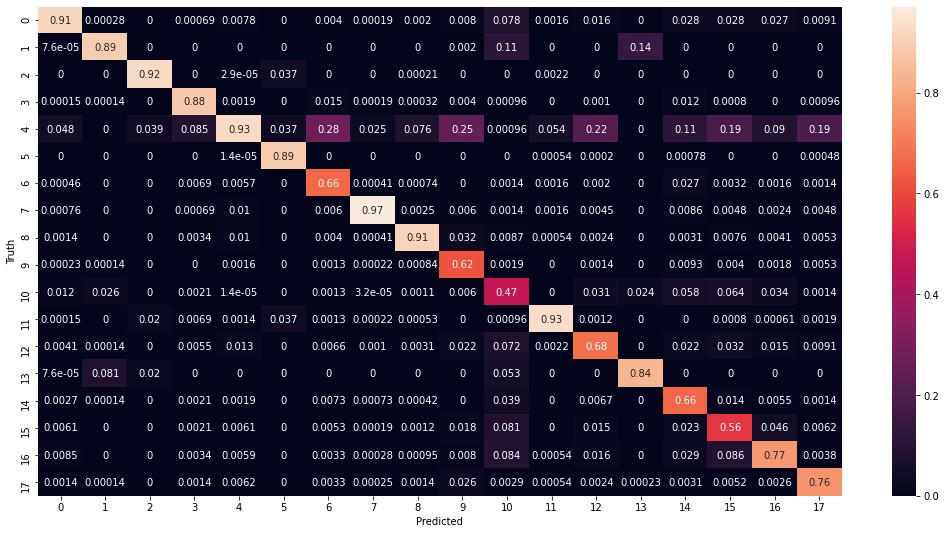

In [25]:
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(18,9))
sn.heatmap(CM, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
import pandas as pd# CMd = pd.DataFrame(CM, columns=devices, index=le1.classes_)

CMd = pd.DataFrame(CM_not, columns=devices, index=devices)

CMd.head(18)

,Samsung SmartCam,Withings Smart Baby Monitor,Withings Smart scale,Samsung Galaxy Tab,TPLink Router,NEST Protect smoke alarm,Triby Speaker,Dropcam,Amazon Echo,TP-Link Smart plug,HP Printer,Netatmo weather station,Netatmo Welcome,Smart Things,PIX-STAR Photo-frame,Belkin Wemo switch,Belkin wemo motion sensor,TP-Link Day Night Cloud camera
Samsung SmartCam,12008,2,0,1,540,0,6,6,19,4,161,3,77,0,36,69,132,19
Withings Smart Baby Monitor,1,6300,0,0,0,0,0,0,0,1,224,0,0,621,0,0,0,0
Withings Smart scale,0,0,47,0,2,1,0,0,2,0,0,4,0,0,0,0,0,0
Samsung Galaxy Tab,2,1,0,1278,134,0,23,6,3,2,2,0,5,0,15,2,0,2
TPLink Router,625,0,2,123,64183,1,416,791,725,126,2,100,1080,0,146,471,445,400
NEST Protect smoke alarm,0,0,0,0,1,24,0,0,0,0,0,1,1,0,1,0,0,1
Triby Speaker,6,0,0,10,393,0,1002,13,7,0,3,3,10,0,35,8,8,3
Dropcam,10,0,0,1,701,0,9,30709,24,3,3,3,22,0,11,12,12,10
Amazon Echo,19,0,0,5,691,0,6,13,8632,16,18,1,12,0,4,19,20,11
TP-Link Smart plug,3,1,0,0,109,0,2,7,8,311,4,0,7,0,12,10,9,11


In [27]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1Score, support = precision_recall_fscore_support(y_test, predicted)
print(precision, recall, f1Score, support)

[0.91419871 0.89209856 0.92156863 0.88016529 0.92811696 0.88888889
 0.66489715 0.97082069 0.90853594 0.61829026 0.46554217 0.93434617
 0.68079497 0.83607666 0.66303502 0.56142457 0.7693401  0.75787966] [0.9178323  0.88148874 0.83928571 0.86644068 0.9216928  0.82758621
 0.66755496 0.97396131 0.91179888 0.62955466 0.48445336 0.92530897
 0.70480789 0.84503191 0.68488746 0.57102157 0.7799506  0.74577068] [0.9160119  0.88676191 0.87850467 0.87324906 0.92489372 0.85714286
 0.6662234  0.97238846 0.91016449 0.62387161 0.47480954 0.92980562
 0.69259336 0.84053043 0.6737841  0.56618241 0.77460902 0.75177641] [13083  7147    56  1475 69636    29  1501 31530  9467   494  1994  1861
  4763  4388  1244  2457  4858  2128]


In [28]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, predicted)

0.7876904824200177

In [30]:
features = ['frameNumber','timeRelative','frame.len','protocolNumber','protocolName','ipDst','srcPort','dstPort','ipDSCP']

# print(arra)
X = dfs[features]
# print(X)
# X.head()
y1 = dfs['ethsrc']
# print(y1)
# y1.head()
y2 = dfs['ethdst']

In [31]:
catCols = ['frameNumber','timeRelative','frame.len','protocolNumber','srcPort','dstPort','ipDSCP']
for col in catCols:
    X[col] = pd.to_numeric(X[col],errors='coerce')

print(X.dtypes)


textCols = ['protocolName', 'ipDst']

for col in textCols:
    X.loc[X[col]=='',[col]] = "missing"
# categories = [X[column].unique() for column in textCols]
# cat_colwise = categories
# print(categories)

# categories = [item for sublist in categories for item in sublist]
# categories = list(set(categories))



# from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=-1)
imp.fit(X)


Xt = imp.transform(X)

<ipython-input-31-6c556973cbf3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.to_numeric(X[col],errors='coerce')


frameNumber         int64
timeRelative      float64
frame.len           int64
protocolNumber    float64
protocolName       object
ipDst              object
srcPort           float64
dstPort           float64
ipDSCP            float64
dtype: object


/home/deepak/.local/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [32]:
X = pd.DataFrame(data=Xt,columns=features)
X_enc = enc.transform(X)
X = pd.DataFrame(data=X_enc,columns=features)

In [33]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le1.fit(y1)
le1.classes_
y = le1.transform(y1)

In [34]:
classifier.predict_proba(X)

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.95, 0.04, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [35]:
predictedS=classifier.predict(X)
predictedS

array([ 7,  4,  7, ...,  4, 15,  4])

In [36]:
predicted27 = classifier.predict(X27)
predicted27

array([ 7,  4,  7, ...,  4, 15,  4])

In [37]:
not_matching_rows = (predicted27==predictedS)
not_matching_rows.all()

False

In [38]:
not_matching = np.where(not_matching_rows==False)

In [43]:
# print(not_matching.size())
not_matching

(array([    11,     50,     72, ..., 526929, 526958, 526989]),)

In [44]:
for i in not_matching:
    not_matching = i
    break
not_matching

array([    11,     50,     72, ..., 526929, 526958, 526989])

In [45]:
not_matching_list = not_matching.tolist()

In [46]:
len(not_matching_list)

46188

In [47]:
from numpy import loadtxt
array_index = loadtxt('no_ipsrc_array_indices.txt')

In [50]:
print(array_index.size)
array_index

14289


array([32239., 32271., 32348., ..., 89599., 89601., 89605.])

In [49]:
arr_i = np.reshape(array_index,(1,14289))
arr_i

array([[32239., 32271., 32348., ..., 89599., 89601., 89605.]])

In [53]:
no_match = np.reshape(not_matching,(1,46188))
no_match

array([[    11,     50,     72, ..., 526929, 526958, 526989]])

In [55]:
list_index = array_index.tolist()

In [56]:
index = np.argsort(not_matching)
index

array([    0,     1,     2, ..., 46185, 46186, 46187])

In [57]:
sorted_not = not_matching[index]
sorted_not

array([    11,     50,     72, ..., 526929, 526958, 526989])

In [58]:
sorted_index_not = np.searchsorted(sorted_not, array_index)
sorted_index_not

array([ 2156,  2172,  2197, ..., 19294, 19295, 19296])

In [59]:
sorted_indices = np.unique(sorted_index_not)
sorted_indices

array([ 2094,  2095,  2096, ..., 19294, 19295, 19296])

In [60]:
sorted_indices.size

14032

In [61]:
sorted_indices.size/array_index.size

0.9820141367485479

In [65]:
indexa = np.argsort(array_index)
sorted_list = array_index[indexa]
sorted_index_list = np.searchsorted(sorted_list, not_matching)

sorted_indicesa = np.unique(sorted_index_list)
print(sorted_indicesa.size)
sorted_indicesa

14030


array([    0,     1,     6, ..., 14287, 14288, 14289])

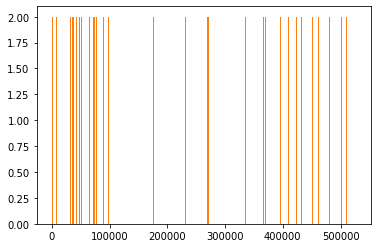

In [67]:
from matplotlib import pyplot as plt
plt.bar(array_index,2,width=1)
plt.bar(not_matching,2,width=1)
plt.show()

In [100]:
wrongly_identified = sorted_indices.tolist()
wrongly_identified = not_matching[wrongly_identified]
wrongly_identified

array([32040, 32043, 32051, ..., 89599, 89601, 89605])

In [101]:
wrongS = predictedS[wrongly_identified]
correct27 = predicted27[wrongly_identified]
correct27

array([8, 8, 8, ..., 7, 7, 7])

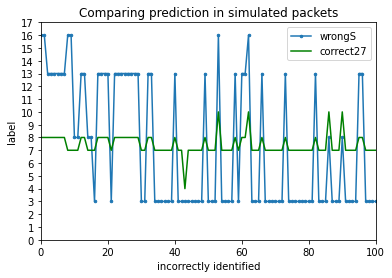

In [113]:
plt.plot(wrongS, label='wrongS', marker='.', markersize='5')
plt.plot(correct27,label='correct27', color='g')
plt.xlabel('incorrectly identified')
plt.ylabel('label')
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.legend()
plt.title('Comparing prediction in simulated packets')
plt.axis([0,100,0,17])
plt.show()

In [168]:
plt.plot(df27['timeRelative'],df.loc[df['eth.src']=='ec:1a:59:83:28:11','frame.len'])

NameError: name 'df' is not defined

In [139]:
unique_protocol = df27['protocolName'].unique()

In [167]:
protocol_frame_len_unique_len = []
protocol_frame_len_unique = []
total_len_per_proto = []
for p in unique_protocol:
#     print(p)
    pro_len = df27.loc[df27['protocolName']==p,'frame.len']#['frame.len'].unique()
    s = pro_len.size
    total_len_per_proto.append(s)
    pro_len = pro_len.unique()
    pro_len = pro_len.tolist()
    protocol_frame_len_unique.append(pro_len)
    protocol_frame_len_unique_len.append(len(pro_len))
#     break
#     protocol_frame_len += pro_len

# pro_len.size
protocol_frame_len_unique

[['156',
  '284',
  '60',
  '172',
  '160',
  '123',
  '95',
  '140',
  '135',
  '139',
  '425',
  '211',
  '224',
  '97',
  '583',
  '1484',
  '192',
  '117',
  '158',
  '824',
  '201',
  '335',
  '89',
  '93',
  '246',
  '408',
  '1514',
  '264',
  '316',
  '359',
  '471',
  '571',
  '380',
  '107',
  '396',
  '368',
  '219',
  '91',
  '103',
  '300',
  '336',
  '357',
  '1510',
  '347',
  '529',
  '236',
  '184',
  '109',
  '940',
  '481',
  '514',
  '127',
  '230',
  '320',
  '104',
  '448',
  '88',
  '171',
  '183',
  '207',
  '345',
  '267',
  '525',
  '926',
  '260',
  '259',
  '222',
  '256',
  '324',
  '593',
  '378',
  '194',
  '1051',
  '308',
  '1127',
  '883',
  '1367',
  '1463',
  '245',
  '122',
  '242',
  '205',
  '1481',
  '162',
  '203',
  '263',
  '987',
  '976',
  '1413',
  '551',
  '173',
  '253',
  '1469',
  '1104',
  '1472',
  '124',
  '967',
  '1446',
  '1468',
  '1480',
  '625',
  '1258',
  '636',
  '984',
  '645',
  '962',
  '1424',
  '247',
  '328',
  '743',


In [166]:
protocol_frame_len_unique_len

[518,
 112,
 1,
 99,
 3,
 4,
 1,
 2,
 19,
 1,
 6,
 36,
 2,
 23,
 2,
 3,
 2,
 2,
 1,
 1,
 3,
 7,
 4,
 11,
 1,
 71,
 3,
 2,
 1,
 39,
 18,
 2,
 1,
 70,
 2,
 16,
 1,
 1,
 8,
 2,
 1,
 2,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 2,
 2,
 9,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 3,
 1,
 2,
 2,
 1,
 2,
 2,
 5,
 1,
 2,
 1,
 2,
 1,
 1,
 None,
 None]

In [165]:
total_len_per_proto

[122684,
 216966,
 3707,
 9993,
 31082,
 6450,
 7870,
 57474,
 22747,
 1640,
 1286,
 9803,
 2853,
 1730,
 1329,
 14418,
 240,
 582,
 20,
 510,
 3382,
 4751,
 304,
 132,
 122,
 621,
 117,
 1296,
 336,
 773,
 781,
 6,
 355,
 282,
 124,
 26,
 2,
 5,
 34,
 8,
 12,
 10,
 2,
 2,
 6,
 2,
 14,
 1,
 9,
 6,
 10,
 36,
 4,
 1,
 4,
 1,
 1,
 4,
 2,
 6,
 1,
 4,
 4,
 10,
 9,
 2,
 14,
 1,
 2,
 1,
 8,
 4,
 1,
 [['156',
   '284',
   '60',
   '172',
   '160',
   '123',
   '95',
   '140',
   '135',
   '139',
   '425',
   '211',
   '224',
   '97',
   '583',
   '1484',
   '192',
   '117',
   '158',
   '824',
   '201',
   '335',
   '89',
   '93',
   '246',
   '408',
   '1514',
   '264',
   '316',
   '359',
   '471',
   '571',
   '380',
   '107',
   '396',
   '368',
   '219',
   '91',
   '103',
   '300',
   '336',
   '357',
   '1510',
   '347',
   '529',
   '236',
   '184',
   '109',
   '940',
   '481',
   '514',
   '127',
   '230',
   '320',
   '104',
   '448',
   '88',
   '171',
   '183',
   '207',
   '345',

In [155]:
protocols = unique_protocol.tolist()

In [162]:
protocol_mapping = protocols.append(protocol_frame_len_unique_len)
protocol_mapping

In [164]:
protocols

['eth:ethertype:ip:tcp:tls',
 'eth:ethertype:ip:tcp',
 'eth:ethertype:ip:udp:ntp',
 'eth:ethertype:ip:udp:dns',
 'eth:ethertype:ip:icmp:data',
 'eth:ethertype:ip:udp:data',
 'eth:ethertype:ip:udp:udpencap',
 'eth:ethertype:arp',
 'eth:ethertype:ip:udp:ssdp',
 'eth:ethertype:ip:udp:udpencap:esp',
 'eth:ethertype:ip:tcp:stun',
 'eth:ethertype:ip:tcp:data',
 'eth:ethertype:ip:igmp:igmp',
 'eth:ethertype:ip:tcp:http',
 'eth:ethertype:ip:tcp:http:xml',
 'eth:ethertype:ipv6:ipv6.hopopts:icmpv6',
 'eth:ethertype:ip:udp:nbdgm:smb:browser',
 'eth:ethertype:ip:tcp:sip',
 'eth:ethertype:ip:tcp:tls:x509sat:x509sat:x509sat:x509sat:x509sat:x509sat:x509sat:x509sat:x509sat:x509sat:x509ce:x509ce:x509ce:x509ce:x509ce:pkix1explicit:pkix1implicit:x509ce:x509ce:pkix1implicit:tls:x509sat:x509sat:x509sat:x509sat:x509sat:x509sat:x509sat:x509sat:x509sat:x509ce:x509ce:x509ce:pkix1implicit:x509ce:pkix1explicit:pkix1implicit:x509ce:x509sat:x509ce:x509ce:x509sat:x509sat:x509sat:x509sat:x509sat:x509sat:x509sat:x509